# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides_per_citytype = pyber_data_df.groupby(["type"]).count()["ride_id"]
# total_rides_per_citytype

In [4]:
# 2. Get the total drivers for each city type
total_drivers_per_citytype = city_data_df.groupby(["type"]).sum()["driver_count"]
# total_drivers_per_citytype

In [5]:
#  3. Get the total amount of fares for each city type
total_fares_per_citytype = pyber_data_df.groupby(["type"]).sum()["fare"]
# total_fares_per_citytype

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride_citytype = pyber_data_df.groupby(["type"]).mean()["fare"]
# avg_fare_per_ride_citytype

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = pyber_data_df.groupby(["type"]).sum()["fare"] / total_drivers_per_citytype
# avg_fare_per_driver

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides_per_citytype, 
    "Total Drivers": total_drivers_per_citytype, 
    "Total Fares": total_fares_per_citytype, 
    "Average Fare Per Ride": avg_fare_per_ride_citytype,
    "Average Fare Per Driver": avg_fare_per_driver})
# pyber_summary_df.head()
# pyber_summary_df.dtypes

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
# pyber_summary_df.head()

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"]= pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("${:,.2f}".format)

pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame (call the one from deliv 1 - pyber_data_df )
pyber_data_df.sample(10)

,city,date,fare,ride_id,driver_count,type
829,Lake Danielberg,2019-01-28 15:49:50,25.98,1418324640212,19,Urban
1235,Richardfort,2019-01-13 10:08:54,25.81,9110913538598,38,Urban
1612,Royland,2019-01-18 00:03:01,32.11,4548837819274,64,Urban
646,Huntermouth,2019-03-14 10:37:58,30.49,9537564108817,37,Urban
1946,South Brenda,2019-01-01 12:32:48,25.56,2613536554411,1,Suburban
1221,Port Johnbury,2019-04-12 03:43:45,8.42,39663640391,3,Urban
359,South Michelleport,2019-02-22 07:44:56,22.52,8522744579472,72,Urban
173,West Angela,2019-01-30 18:46:42,32.31,7288678136396,48,Urban
1611,Grahamburgh,2019-01-03 15:37:24,17.61,7877228075348,61,Urban
635,Valentineton,2019-04-03 11:34:45,18.62,555060361832,45,Urban


In [21]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_date_df = pyber_data_df.groupby(["type","date"]).sum()['fare']
# fares_by_date_df

In [22]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_by_date_df = fares_by_date_df.reset_index()
# fares_by_date_df.head()

In [23]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_by_date_pivot = fares_by_date_df.pivot(index="date", columns="type", values="fare")
# fares_by_date_pivot.head()

In [24]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_by_date_pivot_filt = fares_by_date_pivot.loc['2019-01-01':'2019-04-28']
# fares_by_date_pivot_filt.head()

In [25]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fares_by_date_pivot_filt.index = pd.to_datetime(fares_by_date_pivot_filt.index)

In [26]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_by_date_pivot_filt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [27]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_by_date_df =fares_by_date_pivot_filt.resample('W').sum()
# fares_by_date_df.head(10)

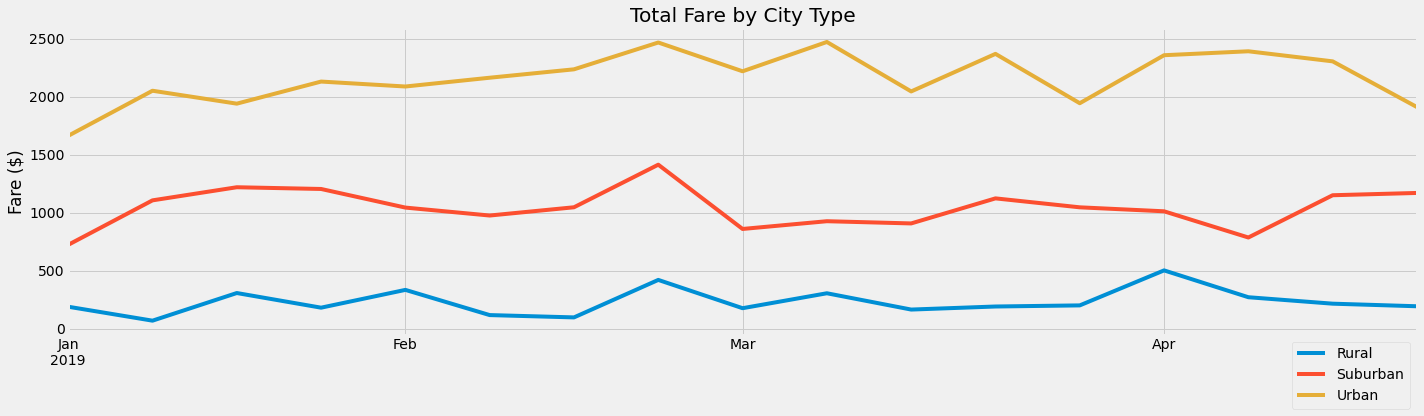

In [28]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
#set line plot [default] and size
fares_by_week = fares_by_date_df.plot(figsize=(20,6))
#set labels
fares_by_week.set_title("Total Fare by City Type")
fares_by_week.set_ylabel("Fare ($)")
#hide xlabels
fares_by_week.set(xlabel=None)
#reposition legend from center
fares_by_week.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.tight_layout()
plt.savefig("resources/PyBer_fare_summary.png")
